# Изучение рынка российского кинопроката

## Описание проекта
Мне нужно изучить рынок российского кинопроката и выявить текущие тренды. 

Я работаю с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

## Цели проекта
1. Выявление текущих трендов
2. Изучение фильмов которые получили государственную поддержку
3. Влияние возрастных ограничений на сборы фильмов в прокате в период с 2015 по 2019 год
4. Изучение динамики проката фильмов по годам
5. Узнать как влияют размеры гос помощи на сборы фильмов 

## Описание данных
Таблица mkrf_movies содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений.
- title — название фильма;
- puNumber — номер прокатного удостоверения;
- show_start_date — дата премьеры фильма;
- type — тип фильма;
- film_studio — студия-производитель;
- production_country — страна-производитель;
- director — режиссёр;
- producer — продюсер;
- age_restriction — возрастная категория;
- refundable_support — объём возвратных средств государственной поддержки;
- nonrefundable_support — объём невозвратных средств государственной поддержки;
- financing_source — источник государственного финансирования;
- budget — общий бюджет фильма;
- ratings — рейтинг фильма на КиноПоиске;
- genres — жанр фильма.

Таблица mkrf_shows содержит сведения о показах фильмов в российских кинотеатрах.
- puNumber — номер прокатного удостоверения;
- box_office — сборы в рублях.

## План работы 
1. Знакомство с данными
2. Предобработка данных (изменение типов данных, обработка пропусков и дубликатов, изучение столбцов и добавление новых)
3. Иследовательский анализ данных
4. Иследование фильмов, которые получили государственную поддержку
5. Общие выводы 



# 1 Знакомство с данными

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_shows = pd.read_csv('datasets/mkrf_shows.csv', sep = ',')
df_shows.info()
display(df_shows.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


,puNumber,box_office
0,111000113,2.450000e+03
1,111000115,6.104000e+04
2,111000116,1.530300e+08
3,111000117,1.226096e+07
4,111000118,1.636841e+08


In [4]:
df_movies = pd.read_csv('datasets/mkrf_movies.csv', sep = ',')
df_movies.info()
df_movies.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


# Вывод 1 
1. 2 таблици с данными, которые можно обьдить в одну по столбцу номера прокатного удостоверния
2. Нужно будет обработать пропуски и проверить на наличие дубликатов
3. Также в данных могут быть не соответсвующие значения

# Пред обработка данных

## Изменение типов данных

In [3]:
# Проверка на значения столбца номер удостоверения, обнаружена строка
for i in df_movies['puNumber'].unique():
    try:
        int(i)
    except BaseException:
        print(i)

# Загуглил номер удостоверения для этого фильма, обнаружел что в таблице есть 
# данные для этого фильма только в названии фильма в конце точка

display(df_movies.query('puNumber == "нет"'))
display(df_movies.query('title == "Курбан-роман. (История с жертвой)."'))

# Убираю из таблица эту строку
df_movies = df_movies.query('puNumber != "нет"')
df_movies.reset_index(drop = True, inplace = True)
df_movies['puNumber'] = pd.to_numeric(df_movies['puNumber'])
        


нет


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
1797,Курбан-роман. (История с жертвой),нет,2014-05-15T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
2078,Курбан-роман. (История с жертвой).,111009614,2014-09-02T12:00:00.000Z,Художественный,"ФОНД ""ИННОВАЦИЯ""",Россия,С.Юзеев,М.Галицкая,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN


Обработал столбец с номером прокатного удостоверения, оказалось что есть одно не числовое значние

In [4]:
df = df_movies.merge(df_shows, on='puNumber', how='left') 
df.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


Соединил 2 таблици по общему столбцу 

In [5]:
df.dtypes

title                     object
puNumber                   int64
show_start_date           object
type                      object
film_studio               object
production_country        object
director                  object
producer                  object
age_restriction           object
refundable_support       float64
nonrefundable_support    float64
budget                   float64
financing_source          object
ratings                   object
genres                    object
box_office               float64
dtype: object

Просмотр типов данных каждого столбца 

In [6]:
df['show_start_date'] = df['show_start_date'].apply(func = lambda x: x.split('T')[0])
df['show_start_date'] = pd.to_datetime(df['show_start_date'], format='%Y-%m-%d')
df.dtypes

title                            object
puNumber                          int64
show_start_date          datetime64[ns]
type                             object
film_studio                      object
production_country               object
director                         object
producer                         object
age_restriction                  object
refundable_support              float64
nonrefundable_support           float64
budget                          float64
financing_source                 object
ratings                          object
genres                           object
box_office                      float64
dtype: object

Поменял тип данных на временной, также удалил часы, минуты и секунды так как они были во всех значенниях равны нулям

In [7]:
# Формирую список значенний столбца, которые невозможно конвертировать в тип Флоат
wrong_rating_format = []

for i in df['ratings'].unique():
    try:
        float(i)
    except BaseException:
        wrong_rating_format.append(i)

# Вывожу их на экран и замечаю закономерность что эти данные можно преобразовать что бы потом возможно было приемнить 
# Изменения типа данных
display(df.query('ratings in @wrong_rating_format'))

df['ratings'] = df['ratings'].apply(func = lambda x: float(x[:2]) / 10 if x in wrong_rating_format else x)

df['ratings'] = df['ratings'].astype('float64')
df.dtypes

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
259,Прошлое,221030715,2015-07-29,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,99%,"ужасы,триллер,драма",NaN
811,От винта!,114000212,2012-08-06,Анимационный,"ЗАО ""Продюсерский центр ""Парадиз""",Россия,О.Лопато,"Г.Нерсисян, А.Манасарян, А.Нерсесян",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,28%,"детский,приключения,комедия",1.740000e+03
1053,Песочный человек,121029212,2012-11-29,Художественный,Спотлайт Медиа Продакшн,Швейцария,Питер Луизи,"Дэвид Луизи, Питер Луизи",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,97%,"ужасы,фантастика,фэнтези",NaN
1341,Сказка о добре и Вре,111008913,2013-11-15,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,99%,"триллер,драма,детектив",NaN
1804,Спираль.,111001014,2014-01-30,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,99%,"аниме,мультфильм,ужасы",4.295000e+03
1873,Короткие истории о любви 2,121002615,2015-02-13,Художественный,"Кавиар, Курт 13, СтритЛайт Филмз, Нэйер Дойче ...",Нидерланды - США - Германия - Канада - Франция...,"Мэтью Аувро, Лео Брайдл, Бен Бренд, Ден Кларк,...","Мэри Пэт Бентел, Бен Бренд, Сиара Гиллан, Джор...",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,83%,NaN,1.429859e+06
1898,Золушка /По сказке Шарля Перро/. Холодное торж...,121003615,2015-02-27,Художественный,"Женр Филмз, Уолт Дисней Пикчерз",США,Кеннет Брана,"Дэвид Бэррон, Саймон Кинберг, Эллисон Ширмур",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,64%,"мюзикл,фэнтези,мелодрама",5.287326e+08
2125,Поездка к матери,111002015,2015-03-02,Художественный,"ЗАО ""Киностудия ""М""-Фильм""",Россия,М.Косырев-Нестеров,М.Косырев-Нестеров,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,91%,"драма,семейный",0.000000e+00
2145,Главный,111003415,2015-03-27,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0.0,10000000.0,40000000.0,Министерство культуры,94%,"фантастика,боевик,комедия",3.347500e+05
2437,Самый рыжий Лис,111012715,2015-07-30,Художественный,"ООО ""Продюсерский центр ""Ленфильм""",Россия,А.Стреляная,"А.Котелевский, Э.Пичугин",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,62%,"фэнтези,семейный",NaN


title                            object
puNumber                          int64
show_start_date          datetime64[ns]
type                             object
film_studio                      object
production_country               object
director                         object
producer                         object
age_restriction                  object
refundable_support              float64
nonrefundable_support           float64
budget                          float64
financing_source                 object
ratings                         float64
genres                           object
box_office                      float64
dtype: object

Изменил типы данных рейтинг, а также предобработал не коректные процентные значения

## Обработка пропусков и дубликатов

In [8]:
for i in df.columns:
    print(f'{i} - {df[i].isna().sum()}')

title - 0
puNumber - 0
show_start_date - 0
type - 0
film_studio - 18
production_country - 2
director - 9
producer - 568
age_restriction - 0
refundable_support - 7153
nonrefundable_support - 7153
budget - 7153
financing_source - 7153
ratings - 966
genres - 975
box_office - 4327


Показываю количество нанов во всех столбцах

In [9]:
display(df[df['film_studio'].isna()])

df['film_studio'] = df['film_studio'].fillna('Без студии')
df['film_studio'].isna().sum()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Ни...","Татьяна Келли, Роберта Мунро, Руперт Френд, До...",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.3,комедия,NaN
4440,Мульт личности. Выпуск 5,214000410,2010-01-25,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN
6104,Значит любит,111013818,2018-08-10,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6180,Несейка. Младшая дочь,112007018,2018-09-01,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6378,Ян Антонышев,112011818,2018-11-15,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011918,2018-11-15,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6398,Доживем до каникул?..,111021918,2018-11-15,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,41225.0
6484,До и После,112014418,2018-12-05,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.9,"драма,криминал,детектив",NaN
6493,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6496,Мой папа Чингисхан,112014918,2018-12-06,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


0

Загуглил фильмы где в колонке студия стояли наны, оказалось что это фильмы без студии, в основном любительские, заполнил как фильмы без студии

In [10]:
display(df[df['production_country'].isna()])
# Обнаружил 2 фильма, которые остались без страны производителя

display(df[df['film_studio'] == "ООО \"Продюсерский центр ЕРАЛАШ\""])
frt_production_country_i = df[df['film_studio'] == "ООО \"Продюсерский центр ЕРАЛАШ\""]['production_country'].first_valid_index()
print(frt_production_country_i)
df.loc[3185, 'production_country'] = df.loc[frt_production_country_i, 'production_country']



df = df.query('title != "Мульт личности. Выпуск 5"')
df.reset_index(drop = True, inplace = True)


display(df[df['production_country'].isna()]['production_country'].sum())


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3185,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
4440,Мульт личности. Выпуск 5,214000410,2010-01-25,Художественный,Без студии,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.0,"мультфильм,комедия",NaN


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1010,"Детский юмористический киножурнал ""Ералаш"", вы...",111001613,2013-05-16,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Г.Курлаев, С.Морозов, В.Панжев, Н.Репина, К.Се...","ООО ""Продюсерский центр ЕРАЛАШ""",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.2,"детский,комедия",3545.0
1282,"Детский юмористический киножурнал ""Ералаш"", вы...",111008613,2013-10-18,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"И.Белостоцкий, В.Панжев, А.Щеглов, Н.Хлопецкая...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",3580.0
2000,"Детский юмористический киножурнал ""Ералаш"", вы...",111006314,2014-06-19,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Г.Курлаев, С.Морозов, В.Панжев, Н.Репина, К.Се...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",NaN
2143,"Детский юмористический киножурнал ""Ералаш"", вы...",111002515,2015-03-12,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"В.Панжев, Е.Соколов, А.Щеглов, Г.Курлаев, Н.Ре...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",NaN
2359,"Детский юмористический киножурнал ""Ералаш"", вы...",111014014,2014-10-10,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"И.Белостоцкий, Р.Фрунтов, А.Зеленков, Е.Юликов...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",165.0
3119,"Детский юмористический киножурнал ""Ералаш"", вы...",111021215,2015-12-22,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Г.Курлаев, В.Панжев, Е.Соколов, С.Морозов и др.","ООО ""Продюсерский центр ЕРАЛАШ""",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.2,"детский,комедия",NaN
3185,"Детский юмористический киножурнал ""Ералаш. Ну ...",111001216,2016-02-09,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",194527.0
3213,"Детский юмористический киножурнал ""Ералаш"", вы...",111012816,2016-08-17,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Е.Соколов, Е.Морозова, В.Панжев, Г.Курлаев и др.","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",457576.0
5660,"Детский юмористический киножурнал ""ЕРАЛАШ"", вы...",111011917,2017-12-26,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Е.Соколов, В.Панжев, Г.Курлаев, С.Морозов, М.С...","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,0.0,25000000.0,44600000.0,Министерство культуры,7.2,"детский,комедия",NaN
6643,"Детский юмористический киножурнал ""Ералаш"", вы...",114000419,2018-02-16,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",Россия,"Г.Курлаев, И.Ситников, А.Щеглов, В.Панжев и др.","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.2,"детский,комедия",NaN


1010


0

1. Обнаружил 2 пропуска с фильмами, где не указана страна производства
2. Один заполнил, второй удалил, так как было много данных, строка показалась странной

In [11]:
display(df[df['director'].isna()])

df['director'] = df['director'].fillna('Не указан')
display(df[df['director'].isna()]['director'].sum())


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берли...",126003512,2012-12-04,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,44350.0
1735,Помпеи. Британский музей,126003413,2013-09-11,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3839,Зур концерт (Большой концерт).,217027010,2010-06-24,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4051,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфулл...",217017310,2010-04-22,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4297,Изге Вэли (Святой Валентин),217020610,2010-05-20,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4414,Bon Jovi. The Circle Tour,126001710,2010-11-11,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.9,"концерт,музыка",NaN
4921,Георг Фридрих Гендель. Мессия. Оратория. Корол...,126001111,2011-04-25,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4940,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.7,"концерт,музыка",NaN


0

В фильмах, где не было указано режисера заменил просто на слово не указан, скорей всего пропуски в этой колонке связанно что тяжело найти информацию про режисерров этих фильмов

In [12]:
display(df[df['producer'].isna()])


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.7,драма,NaN
6,Любовь и голуби,111007013,2013-10-18,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.3,"мелодрама,комедия",2700.0
9,Отпуск за свой счет,111019114,2014-12-01,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"мелодрама,комедия",NaN
11,Ответный ход,111019014,2014-12-01,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.8,"боевик,драма,приключения",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7403,Отряд специального назначения,111020419,2019-12-01,Художественный,Свердловская киностудия,СССР,Г.Кузнецов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.0,"приключения,военный",NaN
7404,Назначаешься внучкой,111020519,2019-12-01,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.0,военный,NaN
7405,Перед рассветом,111020619,2019-12-01,Художественный,Свердловская киностудия,СССР,Я.Лапшин,NaN,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.9,"драма,мелодрама",NaN
7406,Ты помнишь,111020719,2019-12-01,Художественный,Свердловская киностудия,СССР,О.Николаевский,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.0,"драма,мелодрама,военный",NaN


Продюсер в основном пропущен в советских фильмах, но у этих фильмах продюсер есть, по этому решил оставить пропуски

In [13]:
# display(df[~df['refundable_support'].isna()].head())

df['refundable_support'] = df['refundable_support'].fillna(0)
df['nonrefundable_support'] = df['nonrefundable_support'].fillna(0)
df['financing_source'] = df['financing_source'].fillna('нет')

def support_budget(x):
    if x['budget'] == 0 and (x['refundable_support'] != 0 or x['nonrefundable_support'] != 0):
        return x['refundable_support'] + x['nonrefundable_support']

df['budget'] = df.apply(func = support_budget, axis = 1)

1. у фильмах, которые не финансировались государством не записан бюджет + фильмы производства не в Росии, по этому принял решение оставить Нан
2. Фильмы у которых стоит нан в колонках с гос помошью, скорей всего просто не финансировались государством, по этому принял решение поставить значение 0
3. Вместо бюджето было принято оставить наны, так как нету данных для заполнения, но обнаружил что есть фильмы которые снялись полностью на гос бюджет, по этому их бюджет равено сумме гос помощи

In [14]:
display(df[df['ratings'].isna()].head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,0.0,0.0,NaN,нет,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",NaN,«6+» - для детей старше 6 лет,0.0,0.0,NaN,нет,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,0.0,0.0,NaN,нет,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,NaN,«0+» - для любой зрительской аудитории,0.0,0.0,NaN,нет,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,NaN,«12+» - для детей старше 12 лет,0.0,0.0,NaN,нет,NaN,NaN,NaN


Недостаточно данных что бы заполнить здесь пропуски

In [15]:
display(df[df['genres'].isna()].head())
print(df['genres'].unique())
df['genres'] = df['genres'].fillna('Не указан')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДж...",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон ...",«12+» - для детей старше 12 лет,0.0,0.0,NaN,нет,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",NaN,«6+» - для детей старше 6 лет,0.0,0.0,NaN,нет,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,0.0,0.0,NaN,нет,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28,Художественный,"Чешское телевидение,Студия ""Три брата"" агентск...",Чехия,Владимир Дрга,NaN,«0+» - для любой зрительской аудитории,0.0,0.0,NaN,нет,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,NaN,«12+» - для детей старше 12 лет,0.0,0.0,NaN,нет,NaN,NaN,NaN


['боевик,драма,мелодрама' 'драма,военный' 'фантастика,боевик,триллер'
 'драма' 'мелодрама,комедия' 'мюзикл,мелодрама,комедия' 'комедия,криминал'
 'боевик,триллер,детектив' 'боевик,драма,приключения' 'драма,спорт'
 'триллер,драма,мелодрама' 'комедия,мелодрама' 'драма,мелодрама,комедия'
 'драма,мелодрама' 'драма,история' 'драма,мелодрама,семейный'
 'комедия,мелодрама,криминал' 'комедия' 'боевик,драма,криминал'
 'драма,комедия' 'ужасы,фантастика,комедия'
 'мультфильм,короткометражка,мелодрама' 'драма,криминал'
 'мультфильм,фантастика,фэнтези' 'триллер,драма,криминал'
 'драма,мелодрама,биография' 'драма,комедия,военный'
 'фантастика,драма,детектив' 'мюзикл,семейный' nan
 'военный,приключения,драма' 'документальный,драма'
 'драма,биография,история' 'боевик,триллер,драма' 'фэнтези,боевик'
 'боевик,комедия,криминал' 'мюзикл,комедия,детский'
 'комедия,мелодрама,драма' 'мультфильм,фэнтези,комедия' 'комедия,история'
 'мелодрама' 'драма,биография,музыка' 'фэнтези,драма,мелодрама'
 'триллер,военны

Заполнил пропуски тем что жанр не указан

In [16]:
df[df['box_office'].isna()].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,0.0,0.0,NaN,нет,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,0.0,0.0,NaN,нет,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,нет,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,нет,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,0.0,0.0,NaN,нет,6.8,"фантастика,боевик,триллер",NaN


Недостаточно данных что бы заполнить здесь пропуски

In [17]:
df.duplicated().sum()

0

Дубликатов нету

## Изучение столбцов и добавление новых

In [18]:
print(df['puNumber'].value_counts())
display(df[df['puNumber'] == 221054410])
display(df[df['puNumber'] == 221154310])

221054410    2
221154310    2
221048915    1
121004611    1
121014411    1
            ..
121008915    1
121009015    1
111004115    1
211047015    1
124010719    1
Name: puNumber, Length: 7482, dtype: int64


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5065,Анализируй это!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,0.0,0.0,NaN,нет,7.4,"комедия,криминал",NaN
5066,Анализируй то!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,0.0,0.0,NaN,нет,6.8,"комедия,криминал",NaN


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4636,Как жениться и остаться холостым,221154310,2010-12-17,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,0.0,0.0,NaN,нет,7.0,"мелодрама,комедия",NaN
4637,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,0.0,0.0,NaN,нет,7.6,"драма,мелодрама,история",NaN


Обнаружелись фильмы с одинаковым номером прокатного удостоверение, решил оставить


In [19]:
print(df['type'].unique())

df['type'] = df['type'].apply(func= lambda x : x[1:] if x[0] == ' ' else x) 

print(df['type'].unique())

['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' ' Художественный' ' Анимационный'
 'Музыкально-развлекательный']
['Художественный' 'Анимационный' 'Прочие' 'Документальный'
 'Научно-популярный' 'Музыкально-развлекательный']


Поменял дублирующие строки

In [20]:
print(df['age_restriction'].unique())
df['age_restriction'] = df['age_restriction'].apply(func = lambda x: x.split(' ')[0])

['«18+» - запрещено для детей' '«6+» - для детей старше 6 лет'
 '«12+» - для детей старше 12 лет' '«16+» - для детей старше 16 лет'
 '«0+» - для любой зрительской аудитории']


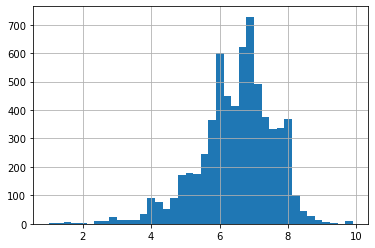

7454    3.073569e+09
5651    2.779686e+09
6818    2.576614e+09
6547    2.271754e+09
3487    2.118396e+09
            ...     
7479             NaN
7480             NaN
7481             NaN
7482             NaN
7483             NaN
Name: box_office, Length: 7484, dtype: float64

In [21]:
df['ratings'].hist(bins = 40)
plt.show()

df['refundable_support'].sort_values(ascending = False)

df['box_office'].sort_values(ascending = False)

Проверил Количественные столбци, не заметил что-то аномального, крое выбросов

In [22]:
df['year'] = df['show_start_date'].dt.year

In [23]:
df['main_director'] = df['director'].apply(func = lambda x: x.split(',')[0])
df['main_genre'] = df['genres'].apply(func = lambda x: x.split(',')[0])


In [24]:
df['share_of_goverment_support'] = (df['refundable_support'] + df['nonrefundable_support']) / df['budget']

## Вывод 2 

1. Изменил типы данных столбцов, многие столбци содержали переменные нескольких типов, по этому стоило проводить обработку прежде чем переводить их все к подходящему типу
2. Обработал временные данные стобцов, добавил столбец года выпуска 
3. Много пропусков есть в данных, некоторые из них можно востановить, но большинство нет, там где это подходило оставлял подходящие заглушки по типам данных
4. Дубликатов в данных нету 
5. Добавил новые Столбци, которые добавляют больше информативности к нашему датасэту, но также обработал дублирующиеся значения в датасэте

# Исследовательский анализ данных

In [25]:
cinema_df = df[~df['box_office'].isna()]
cinema_df.head()
display(cinema_df.groupby('year')['puNumber'].count())

year
2010    105
2011    109
2012    128
2013    184
2014    279
2015    465
2016    526
2017    357
2018    475
2019    530
Name: puNumber, dtype: int64

Фильмы в прокате по годам

In [26]:
share_box_office = cinema_df['puNumber'].count() / df['puNumber'].count()
print(f'{round(share_box_office, 3)} - Доля фильмов с указанной информацией о прокатах')

0.422 - Доля фильмов с указанной информацией о прокатах


In [27]:
display(cinema_df.groupby('year')['box_office'].sum().sort_values())

year
2010    2.428654e+06
2012    6.955423e+06
2011    1.410276e+07
2013    2.979971e+07
2014    7.444952e+09
2015    3.949737e+10
2016    4.786630e+10
2019    4.842571e+10
2017    4.856371e+10
2018    4.966840e+10
Name: box_office, dtype: float64

Из этих данных можно увидеть что минимальной сумма сборов была в 2010 году, а максимальной в 2018

In [28]:
cinema_df.pivot_table(index = 'year', values = 'box_office', aggfunc = ['median' , 'mean'])

,median,mean
,box_office,box_office
year,,
2010,1700.000,2.313004e+04
2011,3000.000,1.293832e+05
2012,5660.000,5.433924e+04
2013,3522.500,1.619549e+05
2014,18160.000,2.668442e+07
2015,4920933.000,8.494057e+07
2016,3846679.410,9.100057e+07
2017,9968340.000,1.360328e+08


Вывел свободную таблицу

/var/folders/r1/fy53d4n56nx9rzfjl_qykkyr0000gn/T/ipykernel_1952/3760165159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samp_year_df['year'] = samp_year_df['year'].astype('str')


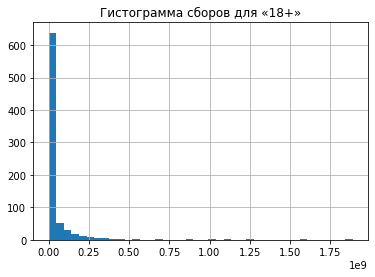

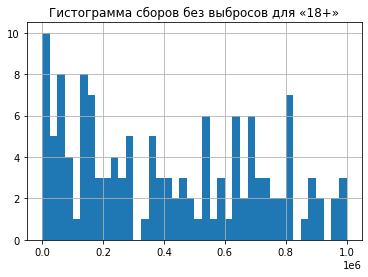

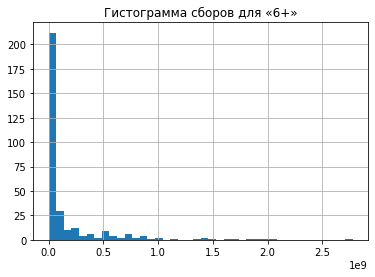

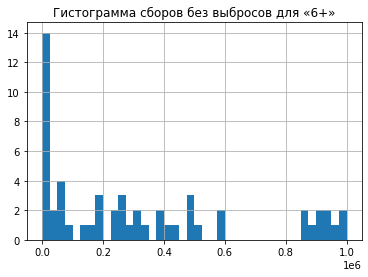

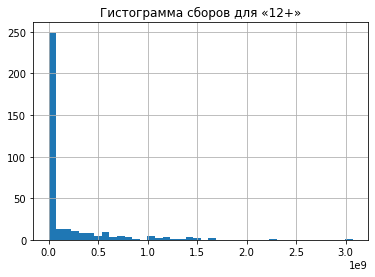

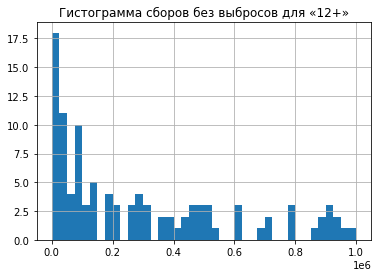

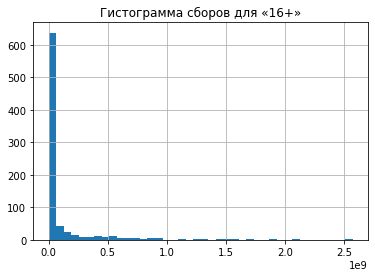

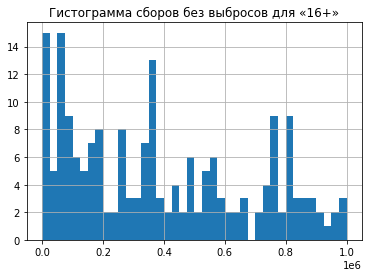

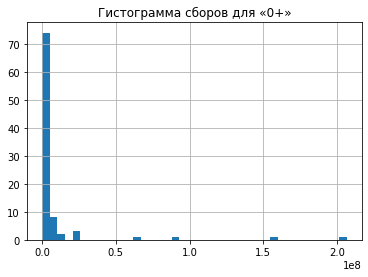

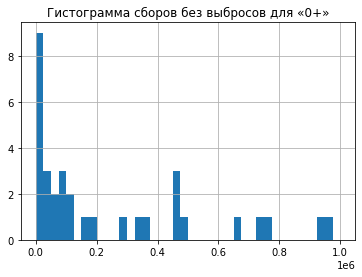

In [29]:
samp_year_df = cinema_df.query('year >= 2015 and year <= 2019')
samp_year_df['year'] = samp_year_df['year'].astype('str')

for i in df['age_restriction'].unique():
    plt.title(f'Гистограмма сборов для {i}')
    samp_year_df.query('age_restriction == @i')['box_office'].hist(bins= 40)
    plt.show()
    
    plt.title(f'Гистограмма сборов без выбросов для {i}')
    samp_year_df.query('age_restriction == @i')['box_office'].hist(bins= 40, range = (0, 1_000_000))
    plt.show()

Визуализация сборов по каждому возрастному ограничению

In [30]:
samp_year_df.groupby('age_restriction')['box_office'].agg(['mean', 'sum', 'median']).sort_values(by = 'sum', ascending = False)

,mean,sum,median
age_restriction,,,
«16+»,9.445309e+07,7.603473e+10,5600007.00
«12+»,1.741938e+08,6.061945e+10,5065044.25
«6+»,1.760209e+08,5.579861e+10,13736207.98
«18+»,5.146416e+07,4.075962e+10,6154439.17
«0+»,8.890961e+06,8.090774e+08,2943318.70


Максимальная сумма сборов у фильмах с возрастной категорией 16+, а минимальная сумма сборов у фильмах с категорией  0+

Но в медианное значение сборов выше у фильмов с категорией 6+, и самое низкое 0+



In [31]:
samp_year_df.pivot_table(index = ['age_restriction', 'year'], values = 'box_office', aggfunc = ['sum', 'mean', 'median'])

sum          mean        median
                        box_office    box_office    box_office
age_restriction year                                          
«0+»            2015  3.790546e+08  9.719348e+06  2.943319e+06
                2016  1.502288e+08  3.664118e+06  2.571294e+06
                2017  2.295989e+08  7.653298e+07  2.217896e+07
                2018  3.244900e+07  6.489800e+06  3.616937e+06
                2019  1.774607e+07  5.915356e+06  3.885434e+06
«12+»           2015  1.361608e+10  1.865217e+08  1.535156e+07
                2016  1.220445e+10  1.488347e+08  4.690635e+06
                2017  7.851428e+09  1.914982e+08  9.010548e+06
                2018  1.426729e+10  2.129447e+08  8.931966e+06
                2019  1.268020e+10  1.491788e+08  3.405546e+06
«16+»           2015  1.136812e+10  6.766739e+07  4.676819e+06
                2016  1.666455e+10  9.156345e+07  5.133022e+06
                2017  1.874504e+10  1.549177e+08  9.702077e+06
                2018  1.650360e+10  1.057923e+08  9.010639e+06
                2019  1.275342e+10  7.164842e+07  3.210718e+06
«18+»           2015  5.432308e+09  4.115385e+07  4.616615e+06
                2016  6.793930e+09  4.499291e+07  6.107002e+06
                2017  9.651496e+09  6.565643e+07  8.212677e+06
                2018  8.760086e+09  4.893903e+07  7.179466e+06
                2019  1.012180e+10  5.531036e+07  5.603217e+06
«6+»            2015  8.701799e+09  1.641849e+08  2.038098e+07
                2016  1.205315e+10  1.721878e+08  3.026256e+06
                2017  1.208614e+10  2.685809e+08  5.199210e+07
                2018  1.010497e+10  1.486026e+08  1.468885e+07
                2019  1.285255e+10  1.586734e+08  1.287535e+07

Вывел мульти-индексовую таблицу

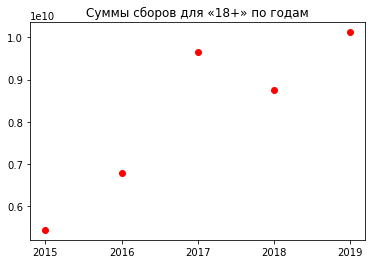

Максимальная сумма сборов для фильмов категории «18+» была в 2019


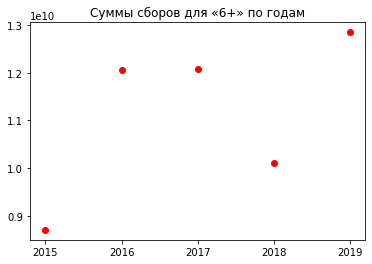

Максимальная сумма сборов для фильмов категории «6+» была в 2019


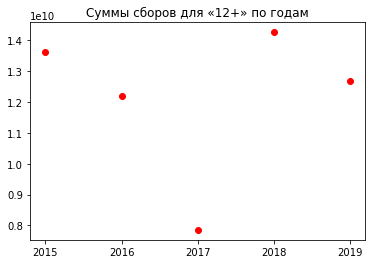

Максимальная сумма сборов для фильмов категории «12+» была в 2018


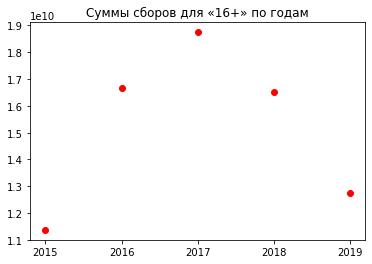

Максимальная сумма сборов для фильмов категории «16+» была в 2017


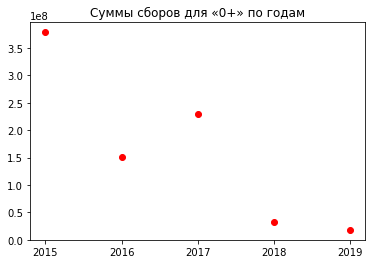

Максимальная сумма сборов для фильмов категории «0+» была в 2015


In [32]:
for i in df['age_restriction'].unique():
    d = samp_year_df.query('age_restriction == @i').groupby('year')['box_office'].agg('sum')
    plt.plot(list(d.index), list(d), 'ro')
    plt.title(f'Cуммы сборов для {i} по годам')
    plt.show()
    print(f'Максимальная сумма сборов для фильмов категории {i.split(" ")[0]} была в {d[d == d.max()].index[0]}')

In [33]:
#Создать плот где по у будут категории, а по х буду года а на графике 
#будут точки с самой большой суммой в каждый год и Медианной

In [34]:
best_sum_categories = []
best_median_categories = []
for i in samp_year_df['year'].unique():
    dq = samp_year_df.query('year == @i').groupby('age_restriction')['box_office'].agg(['median', 'sum'])
    best_sum_categories.append(dq[dq['sum'] == dq['sum'].max()].index[0])
    best_median_categories.append(dq[dq['median'] == dq['median'].max()].index[0])

print(best_sum_categories)
print(best_median_categories)

['«16+»', '«12+»', '«16+»', '«16+»', '«6+»']
['«18+»', '«6+»', '«6+»', '«6+»', '«6+»']


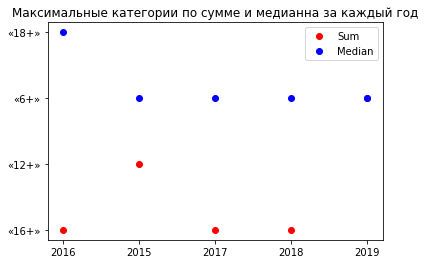

In [35]:
plt.plot(samp_year_df['year'].unique(), best_sum_categories, 'ro', label='Sum')
plt.plot(samp_year_df['year'].unique(), best_median_categories, 'bo', label='Median')
plt.legend()
plt.title(f'Максимальные категории по сумме и медианна за каждый год')
plt.show()

## Вывод 3

1. Посчитал количество фильмов у которых указан прокат, оказалось что это 40% от всех фильмов в датасэте
2. Минимальная общая сумма сборов была в 2010 году, а максимальной в 2018, так же заметил что средние значение сборов в фильмах было самым высоким в 2017 году
3. Максимальная сумма сборов у фильмах с возрастной категорией 16+, а минимальная сумма сборов у фильмах с категорией 0+, Но медианное значение сборов выше у фильмов с категорией 6+, и самое низкое 0+.
4. С годами тенденция осталась, среднее значение сборов выше у фильмах категории 6+ с 2015 года, в 2016 по среднему значению обогнали фильмы 18+
5. По сумме сборов лидер также на протяжении 3 лет были фильмы с категорией 16+
6. Фидьмы с категорией 16+ по сумме сборов были в пике в 2017 году, а потом наблюдаеться спад на спрос фильмов этой категории, например в 2019 году их по сумме сборов обогнали фильмы категории 18+
7. Ткаже из данных можно увидеть что на протяжении с 2015 года по 2019 фильмы сборы фильмов категории 18+ стремительно увеличивались, а фильмы категории 0+ стремительно уменьшались

# Иследование фильмов, которые получили государственную поддержку

In [36]:
gover_df = df.query('refundable_support != 0 or nonrefundable_support != 0')
display(gover_df.head())

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,share_of_goverment_support
1281,Пока еще жива,111005313,2013-10-11,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+»,0.0,26500000.0,NaN,Министерство культуры,8.1,"драма,мелодрама",365353.6,2013,А.Атанесян,драма,NaN
1448,Бесславные придурки,111003314,2014-03-28,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+»,0.0,26000000.0,NaN,Министерство культуры,NaN,Не указан,28140.0,2014,А.Якимчук,Не указан,NaN
1498,Невидимки,111004213,2013-09-10,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+»,0.0,107847945.0,NaN,Фонд кино,5.3,"комедия,фантастика",19957031.5,2013,Р.Давлетьяров,комедия,NaN
1524,БЕРЦЫ,111004314,2014-05-05,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+»,0.0,28000000.0,NaN,Министерство культуры,4.2,драма,55917.5,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,NaN
1792,Братья Ч,111004414,2014-04-23,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+»,0.0,25000000.0,NaN,Министерство культуры,6.4,драма,232100.0,2014,М.Угаров,драма,NaN


Формируэм дата фрейм с фильмами, которые получали гос помощь

In [37]:
gover_df['puNumber'].count()

332

Количество строк в таблице

In [38]:
gover_df['financing_source'].unique()

array(['Министерство культуры', 'Фонд кино',
       'Министерство культуры, Фонд кино'], dtype=object)

Источники финансирования бывают 3 типов
1. Фонд кино
2. Министерство культуры 
3. Фонд кино и Министерство культуры

In [39]:
print(gover_df['budget'].isna().sum())
display(gover_df[gover_df['budget'].isna()].head())
gover_df[~gover_df['budget'].isna()].head()

315


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,share_of_goverment_support
1281,Пока еще жива,111005313,2013-10-11,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+»,0.0,26500000.0,NaN,Министерство культуры,8.1,"драма,мелодрама",365353.6,2013,А.Атанесян,драма,NaN
1448,Бесславные придурки,111003314,2014-03-28,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+»,0.0,26000000.0,NaN,Министерство культуры,NaN,Не указан,28140.0,2014,А.Якимчук,Не указан,NaN
1498,Невидимки,111004213,2013-09-10,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+»,0.0,107847945.0,NaN,Фонд кино,5.3,"комедия,фантастика",19957031.5,2013,Р.Давлетьяров,комедия,NaN
1524,БЕРЦЫ,111004314,2014-05-05,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+»,0.0,28000000.0,NaN,Министерство культуры,4.2,драма,55917.5,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,NaN
1792,Братья Ч,111004414,2014-04-23,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+»,0.0,25000000.0,NaN,Министерство культуры,6.4,драма,232100.0,2014,М.Угаров,драма,NaN


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,year,main_director,main_genre,share_of_goverment_support
2052,14+,111023614,2014-12-19,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+»,0.0,23000000.0,23000000.0,"Министерство культуры, Фонд кино",6.6,мелодрама,10234016.1,2014,А.Зайцев,мелодрама,1.0
2057,Дуxless 2,111000415,2015-01-26,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+»,0.0,75000000.0,75000000.0,Фонд кино,6.6,драма,446163511.0,2015,Р.Прыгунов,драма,1.0
2471,Воин (2015),111017315,2015-09-28,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+»,10000000.0,70000000.0,80000000.0,Фонд кино,7.8,"боевик,драма,криминал",196572438.4,2015,А.Андрианов,боевик,1.0
2531,Бармен.,111009615,2015-05-26,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+»,20000000.0,0.0,20000000.0,Фонд кино,6.2,"комедия,фэнтези",67418974.8,2015,Д.Штурманова,комедия,1.0
2614,Савва. Сердце воина,114001715,2015-07-21,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+»,60000000.0,100000000.0,160000000.0,Фонд кино,4.6,"мультфильм,приключения,фэнтези",184487551.4,2015,М.Фадеев,мультфильм,1.0


У большинства фильмах, которые получали госс помощь не указан бюджет, это значит что помимо госс помощи есть еще дополнительные источники финансов

А в тех данных что стоят данные за бюджет, то это сумма всей госс помощи

In [40]:
print(gover_df['ratings'].isna().sum())
gover_df.query('genres == "Не указан"')['genres'].count()

16


16

Если не указан рейтинг, то и не указан жанр 

In [41]:
gover_df['box_office'].isna().sum()

14

14 фильмов у которых не указаны сборы

/var/folders/r1/fy53d4n56nx9rzfjl_qykkyr0000gn/T/ipykernel_1952/1870854674.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gover_df['full_gover_support'] = gover_df['refundable_support'] + gover_df['nonrefundable_support']


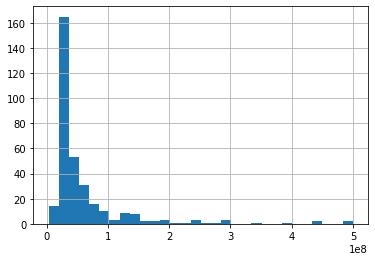

35000000.0


In [42]:
gover_df['full_gover_support'] = gover_df['refundable_support'] + gover_df['nonrefundable_support']

gover_df['full_gover_support'].hist(bins = 30)
plt.show()

print(gover_df['full_gover_support'].median())

В среднем государство выделяет 35000000 рублей на фильмы

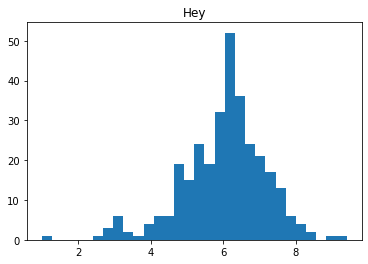

6.2

In [43]:
plt.title('Hey')
plt.hist(gover_df['ratings'], bins = 30)
plt.show()
gover_df['ratings'].median()

Средний рейтинг фильмов с Госс помошью состовляет 6.2

In [44]:
print('Доля фильмов, у которых госс помощь меньше чем сборы')
print(round(gover_df.query('full_gover_support < box_office')['puNumber'].count() / gover_df['puNumber'].count(),3))

print('Доля фильмов, у которых госс помощь больше чем сборы')
print(round(gover_df.query('full_gover_support > box_office')['puNumber'].count() / gover_df['puNumber'].count(),3))

Доля фильмов, которые окупились
0.355
Доля фильмов, которые не окупились
0.602


Как можно заметить 60% фильмов не окупаютса в прокате

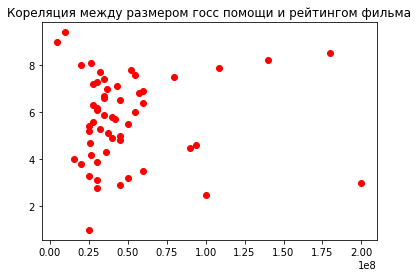

Корреляция по кофф Пирса -0.3336378324333444


In [45]:
rating_grouped =  gover_df.groupby('ratings')['full_gover_support'].agg('median')
plt.title('Кореляция между размером госс помощи и рейтингом фильма')
plt.plot(list(rating_grouped), list(rating_grouped.index), 'ro', label='Sum')
plt.show()

print(f'Корреляция по кофф Пирса {rating_grouped.corr(pd.Series(rating_grouped.index))}')

Особой корреляции нету, но есть тенденция, что чем больше госс помощи тем меньше рейтинг

In [47]:
gover_df['age_restriction'].value_counts()

«16+»    125
«12+»    106
«6+»      65
«18+»     28
«0+»       8
Name: age_restriction, dtype: int64

16+ Категория фильмов финансировалась чаще чем другие

In [48]:
gover_df.groupby('age_restriction')['full_gover_support'].agg('sum').sort_values(ascending = False)

age_restriction
«12+»    7.799394e+09
«16+»    5.569053e+09
«6+»     5.546374e+09
«18+»    1.012347e+09
«0+»     2.735200e+08
Name: full_gover_support, dtype: float64

12+ По количествую финансированиея выше других

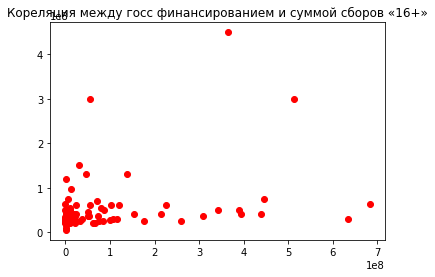

Корреляция по кофф Пирса 0.35283473529780357


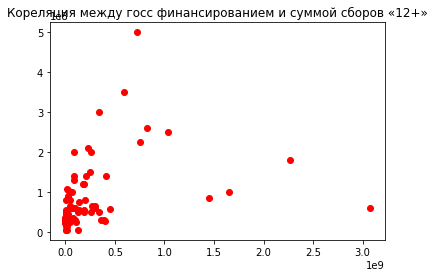

Корреляция по кофф Пирса 0.3769313195070292


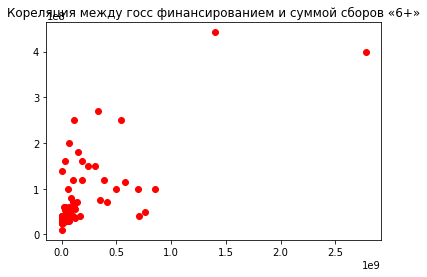

Корреляция по кофф Пирса 0.6942178991566187


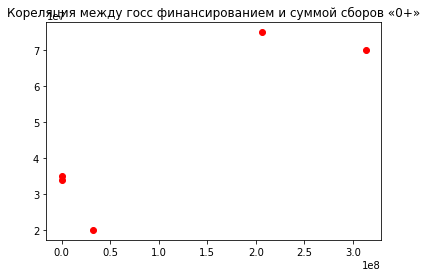

Корреляция по кофф Пирса 0.8861073931496467


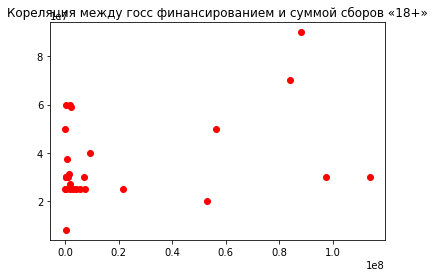

Корреляция по кофф Пирса 0.34573759491027106


In [49]:
for i in gover_df['age_restriction'].unique():
    samp_gover_df = gover_df.query('age_restriction == @i')
    plt.title(f'Кореляция между госс финансированием и суммой сборов {i}')
    plt.plot(samp_gover_df['box_office'], samp_gover_df['full_gover_support'], 'ro')
    plt.show()
    print(f'Корреляция по кофф Пирса {samp_gover_df["full_gover_support"].corr(samp_gover_df["box_office"])}')
    

## Выводы 4

1. В датасэте была представлена не большая выборка данных, всего 332 фильма, которые финансировались государством 
2. В них так жэ были пропуски, для замены которых недостаточно количества информации
3. В основном фильмы которые финансировались государством делились на 2 группы, те у которых бюджет полностью состоял из госс помощи и те у которых по мимо госс помощи были другие источники финансов( У таких фильмах вместо бюджета стоит НАН)
4. В среднем государство выделяет 35_000_00 на финансирование фильма
5. Средний рейтинг фильма состовляет 6.5
6. Также было посчитано что только у 30% фильмов сборы выше чем госс помощь, это еще тоже не означает окупились они или нет, так как неизвестен полный бюджет для большинства фильмов
7. Заметная маленькая тенденция что с увелечением госс помощи, рейтинг у фильма уменьшаеться
8. Больше всего финансировались фильмы категори 16+, а сумма финансирование выше у фильмах 12+
9. Заметна высокая корреляция между количеством финансирования и количеством сбором у фильмах категории 6+, а также для точной корреляции между фильмами 0+ не хватает данных, хотелось бы отметить что это корреляция не гарантируют что фильмы окупаються так как неизвестны другие итосчники финансирования, но все же возможно государствую стоит сконцентрироваться на финансировании фильмах 6+

# Общий вывод
1. На входе для анализа данных были 2 таблици, пришлось их соединить по общему удостоверению
2. Обработал типы данных, создал временные типы данных добавил столбци для информативности, в данных есть наны для которых не хватает информации что бы их заменить
3. В общем для всех фильмов характерно, что фильмы категории 6+ в среднем приносят больше сборы чем остальные, но по сумме сборов в лидерах фильмы категории 16+
4. Из данных про фильмы, которые финансировались госсударством, заметно что для 60% фильмов сборы меньше чем госс помощь, а также что средний рейтинг у фильмов 6.5 
5. Так же есть предположение что госсударству стоит сконцентрироваться на финансировании фильмов 6+, так как для фильмов этой категории наблюдаеться саммая большая позитивная корреляция между суммой финансирования и суммой сборов